### *Importação das bibliotecas utilizadas*

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### **ATIVIDADE 1**
### Carregar uma imagem e aplicar a equalização do histograma. Por fim, salvar a imagem resultante

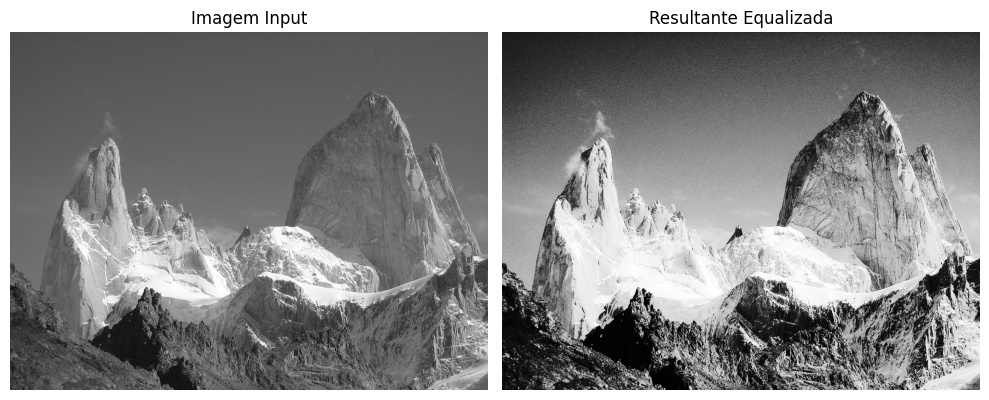

In [19]:
input_img = cv2.imread("input/ex1.jpg")  
gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

equa_img = cv2.equalizeHist(gray_img)

cv2.imwrite('output/ex1_imagem_equalizada.jpg', equa_img)

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title('Imagem Input')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Resultante Equalizada')
plt.imshow(equa_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **ATIVIDADE 2**
### Utilizar uma imagem sub-exposta (subexposição) e aplique uma transformação de intensidade para aumentar o brilho, comparando a imagem de saída com a original (escrever uma análise sobre as diferenças)

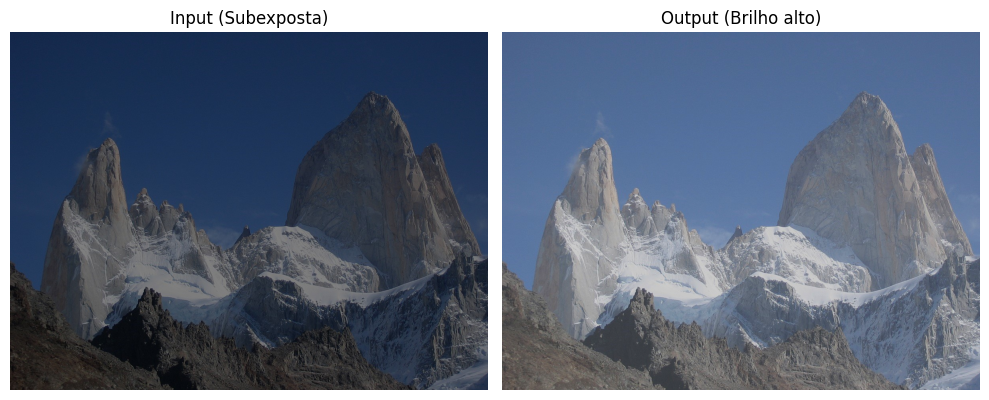

In [20]:
img_subexp = cv2.imread('input/ex2.jpg')

img_brilho = cv2.convertScaleAbs(img_subexp, alpha=1.2, beta=50)  # alpha = ganho, beta = brilho

cv2.imwrite('output/ex2.jpg', img_brilho)


#comparar
img_subexp = cv2.cvtColor(img_subexp, cv2.COLOR_BGR2RGB)
img_brilho = cv2.cvtColor(img_brilho, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input (Subexposta)")
plt.imshow(img_subexp, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output (Brilho alto)")
plt.imshow(img_brilho, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### É possível notar uma diferença entre ambas imagens, dado que a utilizada como input possui regiões com baixa intensidade, sendo possível observar a perda de detalhes e falta de definição em determinadas áreas. Ao realizar a transformação de intensidade e comparando o resultado com a entrada, observa-se um aumento do brilho em toda imagem e a melhora dos detalhes. Um ponto importante, é que a transformação de intensidade deve ser feita com cuidado, porque dependendo da intensidade, algumas regiões podem ter alta exposição afetando a qualidade da imagem.

### **ATIVIDADE 3**
### Desenvolva um código que faça um ajuste de contraste de uma imagem utilizando uma função personalizada de sua autoria

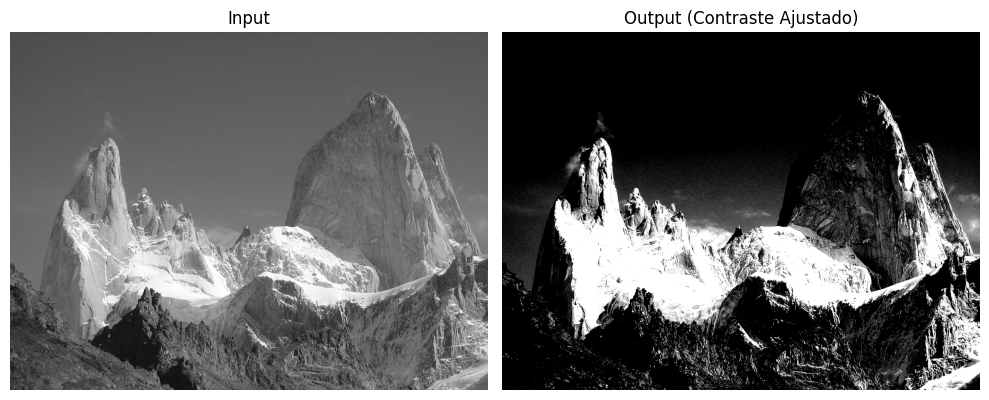

In [21]:
def ajuste_contraste(img, ft_ctrs):

    #Fator de contraste
    # = 1 sem alteração
    # >1 aumenta
    # <1 diminui
    
    img = img.astype(np.float32)
    img_contrastada = ft_ctrs * (img - 128) + 128
    img_contrastada = np.clip(img_contrastada, 0, 255)
    return img_contrastada.astype(np.uint8)

img_in = cv2.imread('input/ex3.jpg', cv2.IMREAD_GRAYSCALE)

fator_contraste = float(input("Digite o fator de contraste: "))  
img_out = ajuste_contraste(img_in, fator_contraste)


# Comparar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(img_in, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output (Contraste Ajustado)")
plt.imshow(img_out, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **ATIVIDADE 4**
### Aplique uma transformação logarítmica em uma imagem para ajustar sua intensidade e compare com a imagem original

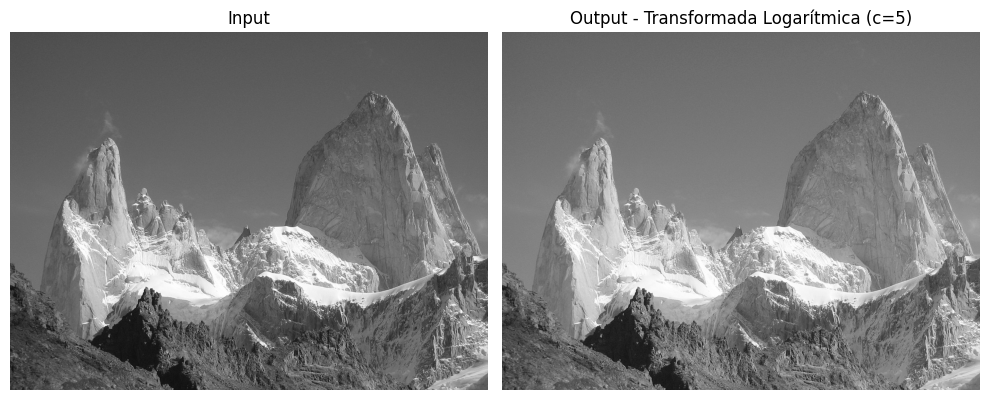

In [22]:
def transformada_logaritmica(imagem, c):
    imagem_float = imagem.astype(np.float32)
    img_norm = imagem_float / 255.0
    
    imagem_log = c * np.log1p(img_norm)  # c*log(1 + r)
    imagem_log = cv2.normalize(imagem_log, None, 0, 255, cv2.NORM_MINMAX)
    
    return imagem_log.astype(np.uint8)

img_in = cv2.imread('input/ex4.jpg', cv2.IMREAD_GRAYSCALE)  
constante_c = 5 
img_log = transformada_logaritmica(img_in, constante_c)

# cv2.imwrite('output/ex4_transformada_logaritmica.jpg', img_log)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(img_in, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Output - Transformada Logarítmica (c={constante_c})")
plt.imshow(img_log, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### **ATIVIDADE 5**
### Crie uma função que normalize os níveis de intensidade de uma imagem para o intervalo de 0 a 255 (intervalo fechado [0, 255]) e faça testes com diferentes imagens

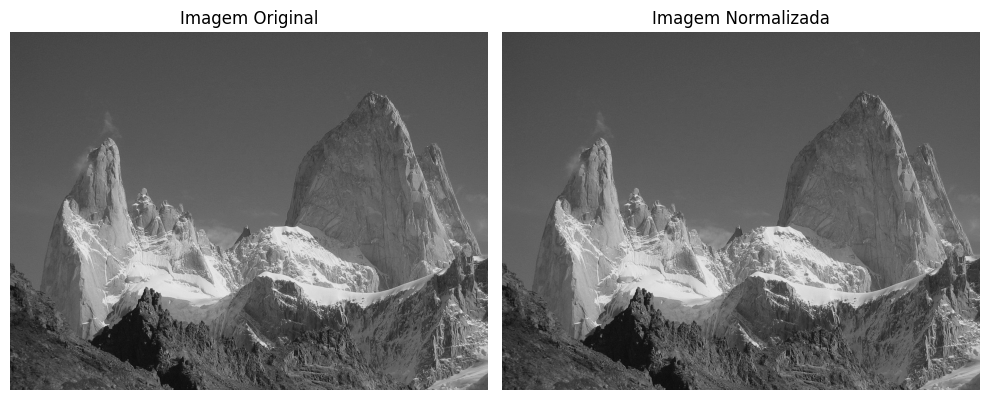

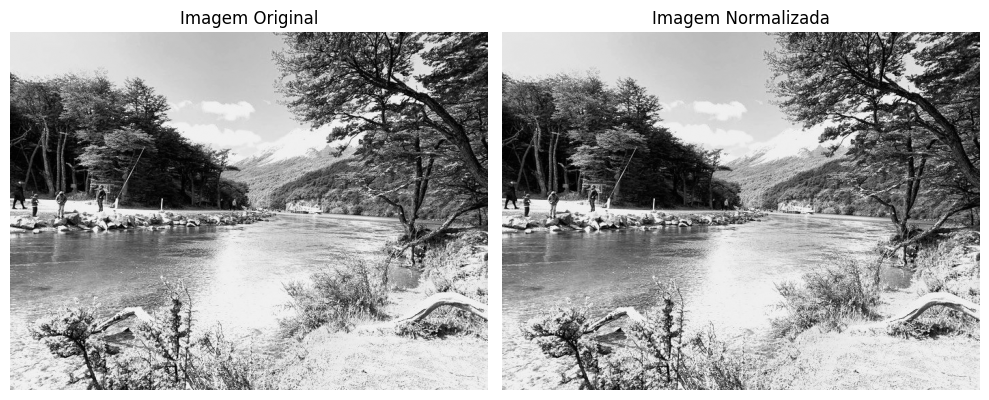

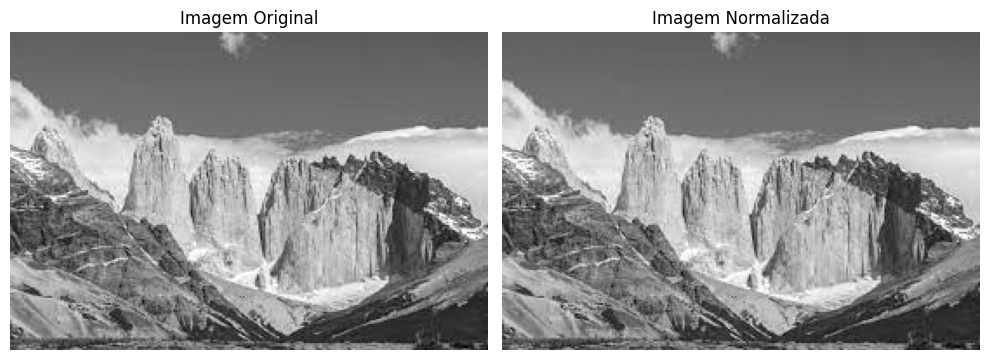

In [23]:
def norm_img(img):
    min_val = np.min(img)
    max_val = np.max(img)
    img_norm = ((img - min_val) / (max_val - min_val)) * 255
    img_norm = np.uint8(img_norm)
    return img_norm


imgs = ['input/ex5_0.jpg', 'input/ex5_1.jpg', 'input/ex5_2.jpg']

for img_path in imgs:
    imagem = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    img_norm = norm_img(imagem)

    # cv2.imwrite(f'output/ex5_normalizada_{img_path.split("/")[-1]}', img_norm)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Imagem Original")
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagem Normalizada")
    plt.imshow(img_norm, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

### **ATIVIDADE 6**
### Escrever um algoritmo/código que aplique um filtro da média em uma imagem

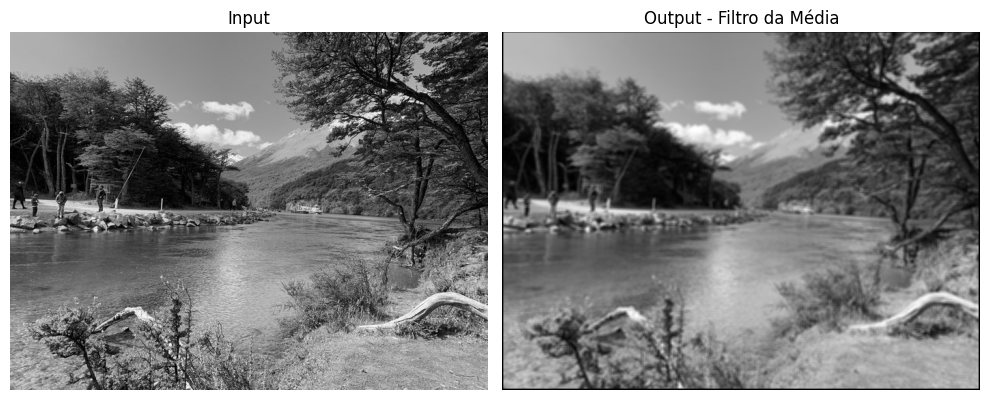

In [24]:
def aplicar_filtro_media(imagem, tamanho_kernel):
    assert tamanho_kernel % 2 == 1, "Tamanho do kernel deve ser ímpar."
    
    imagem_array = np.array(imagem.convert('L'))
    
    altura, largura = imagem_array.shape
    
    deslocamento = tamanho_kernel // 2
    
    imagem_filtrada = np.zeros_like(imagem_array)
    
    for i in range(deslocamento, altura - deslocamento):
        for j in range(deslocamento, largura - deslocamento):
            regiao = imagem_array[i - deslocamento:i + deslocamento + 1, j - deslocamento:j + deslocamento + 1]
            
            media = np.sum(regiao) // (tamanho_kernel * tamanho_kernel)
            
            imagem_filtrada[i, j] = media
    
    return Image.fromarray(imagem_filtrada)

imagem = Image.open('input/ex6.jpg').convert('L')  
img_media = aplicar_filtro_media(imagem, 5)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(imagem, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output - Filtro da Média")
plt.imshow(img_media, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **ATIVIDADE** 7
### Implementar um algoritmo que aplique o filtro da mediana em uma imagem

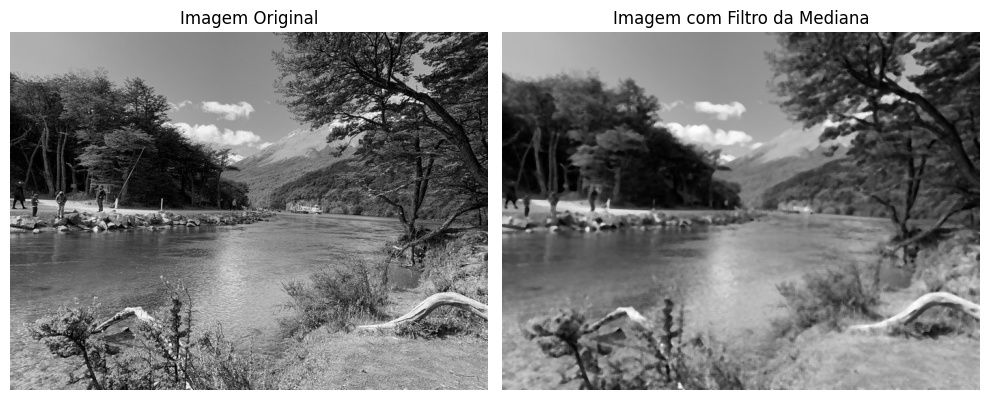

In [25]:
imagem = cv2.imread('input/ex7.jpg', cv2.IMREAD_GRAYSCALE)


kernel_size = 5
imagem_filtrada_mediana = cv2.medianBlur(imagem, kernel_size)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(imagem, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagem com Filtro da Mediana")
plt.imshow(imagem_filtrada_mediana, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### **ATIVIDADE** 8
### Compare os resultados do filtro da média e da mediana, com análise completa (compare estatisticamente)

Estatísticas para Imagem Original: 
Média dos pixels: 106.63
Variância: 3176.31
Desvio padrão: 56.36


Estatísticas para Imagem com Filtro da Média: 
Média dos pixels: 104.72
Variância: 2680.96
Desvio padrão: 51.78


Estatísticas para Imagem com Filtro da Mediana: 
Média dos pixels: 105.92
Variância: 2786.28
Desvio padrão: 52.79




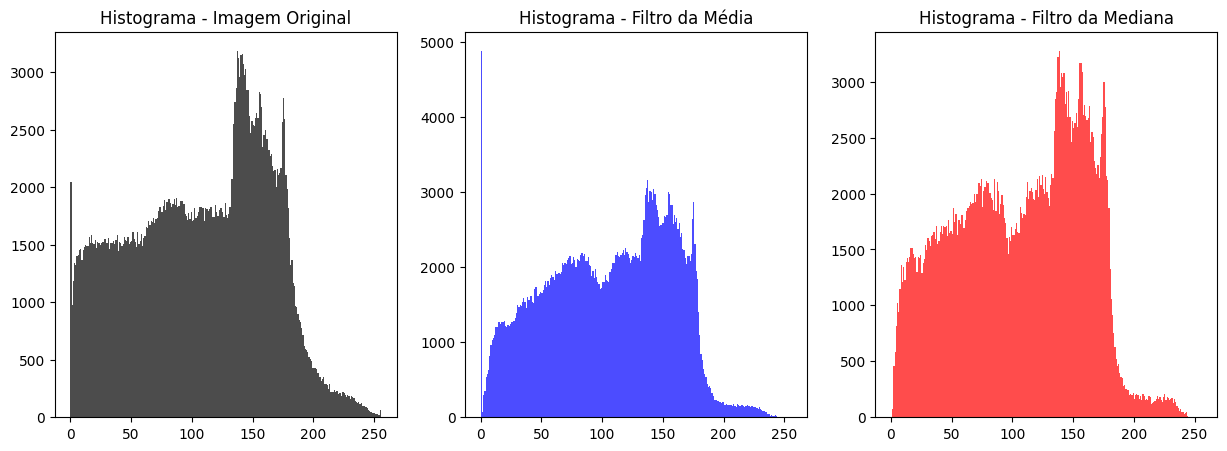

In [26]:
def estatisticas(imagem, nome):
    print(f"Estatísticas para {nome}: ")
    print(f"Média dos pixels: {np.mean(imagem):.2f}")
    print(f"Variância: {np.var(imagem):.2f}")
    print(f"Desvio padrão: {np.std(imagem):.2f}\n\n")

def comparar_histogramas(imagem_original, imagem_media, imagem_mediana):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(np.array(imagem_original).ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title("Histograma - Imagem Original")
    
    plt.subplot(1, 3, 2)
    plt.hist(np.array(imagem_media).ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title("Histograma - Filtro da Média")
    
    plt.subplot(1, 3, 3)
    plt.hist(np.array(imagem_mediana).ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
    plt.title("Histograma - Filtro da Mediana")
    
    plt.show()

estatisticas(imagem, "Imagem Original")
estatisticas(img_media, "Imagem com Filtro da Média")
estatisticas(imagem_filtrada_mediana, "Imagem com Filtro da Mediana")

comparar_histogramas(imagem, img_media, imagem_filtrada_mediana)

### Com a aplicação do filtro da média, é possível observar uma redução dos ruídos na imagem resultante. Porém é visível que aconteceu um desfoque nas regiões próximas às bordas, isso por conta da suavização que foi aplicada. Enquanto para o filtro da mediana, não ocorre esse desfoque nas bordas como da média, pois a suavização atua em ruídos do tipo salt and pepper, são aqueles pontos brancos ou pretos na imagem. Esse tipo de ruído, geralmente, é causado por erros na transmissão de dados ou por erros na conversão analógica-digital. Sendo assim, o filtro mediano acontece por meio da substituição do valor do pixel pela mediana dos níveis de cinza da região Axy do pixel.

### Nos testes realizados, tanto para o filtro da média, quanto para o da mediana, foi considerado um fator igual a 5. E ao realizar as análises estatisticas, observa-se que a variância da imagem com a média é de 2680.96, equanto da mediana é de 2786.28, pois esse menor valor para a primeira já era esperado, dado que na média a variância tende a ser menor.
### Já para o desvio padrão, que está diretamente relacionado à nitidez da imagem, possui um valor menor para a imagem com a média, sendo de 51.78 e de 52.79 para mediana. Isso acontece porque no cenário da média, a variação entre os pixels é menor, pois eles são suavizados com base nos vizinhos.

### **ATIVIDADE** 9
### Escreva um algoritmo que aplique o filtro de realce em imagens naturais (fotos de ambientes)

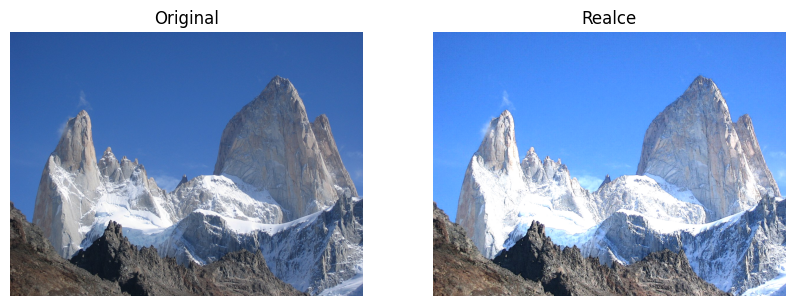

In [27]:
def realce_img(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Erro ao carregar a imagem.")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Laplacian(gray, cv2.CV_64F)
    edges = np.uint8(np.absolute(edges))
    
    image_float = np.float32(image)
    edges_float = np.float32(cv2.merge([edges, edges, edges]))
    
    enhanced = cv2.addWeighted(image_float, 1.5, edges_float, -0.5, 0, dtype=cv2.CV_32F)
    enhanced = np.clip(enhanced, 0, 255)  
    enhanced = np.uint8(enhanced)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.imshow(enhanced_rgb)
    plt.title("Realce")
    plt.axis("off")
    
    plt.show()

image_path = "input/ex9.jpg"  
realce_img(image_path)


### **ATIVIDADE** 10
### Escreva um algoritmo que aplique o filtro de SOBEL nas direções x,y (horizontal e vertical) e compare os resultados com a original


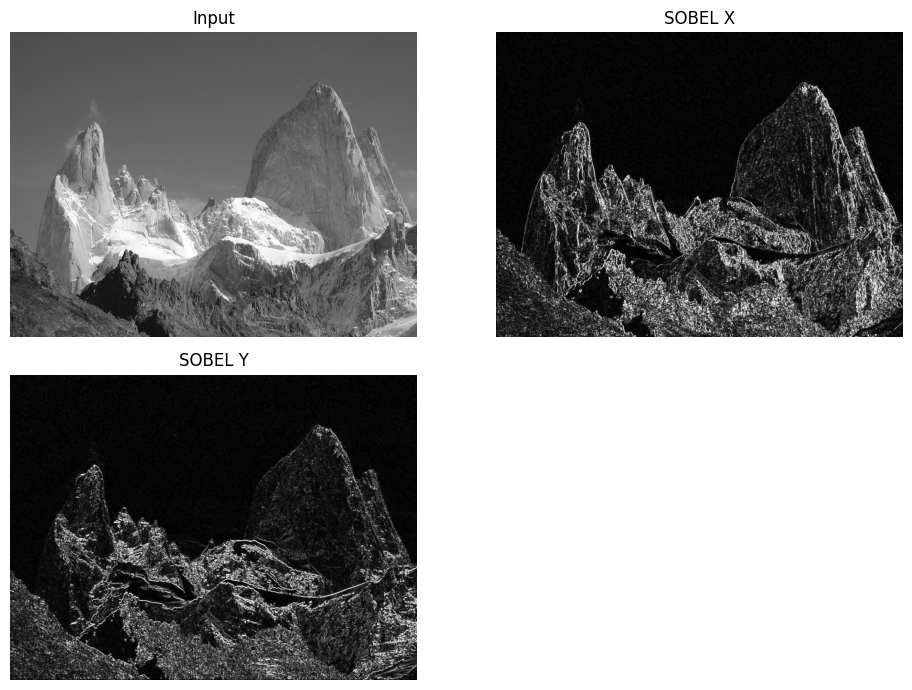

In [28]:

image = cv2.imread("input/ex10.jpg", cv2.IMREAD_GRAYSCALE) 
#sobel na direção x
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

#sobel na direção y
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

mag = cv2.magnitude(sobel_x, sobel_y)


sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
mag = cv2.convertScaleAbs(mag)


plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.title("Input")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("SOBEL X")
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("SOBEL Y")
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()



### O filtro Sobel detecta bordas horizontais e verticais separadamente em imagens em escalas de cinza. Para o resultado SOBEL X, observa-se uma maior detecção de variações no eixo horizontal, sendo que o mesmo acontece para o SOBEL Y na vertical